In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
air_pollution_hammer = pd.read_excel('/Users/dottymorris/Desktop/air_pollution/Hammersmith_and_Fulham_NO2.xlsm', sheet_name = 'Hospitalisations Avoided')
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL,Unnamed: 6
0,1,2016,childhood asthma,0-5,-0.005139,0.076051,NaN
1,1,2016,childhood asthma,06-17,0.086805,0.148457,NaN
2,1,2016,childhood asthma,18-64,0.294462,0.383378,NaN
3,1,2016,childhood asthma,65+,0.096784,0.151127,NaN
4,1,2016,childhood asthma,total,0.472910,0.444569,NaN


In [4]:
air_pollution_hammer2 = pd.read_excel('/Users/dottymorris/Desktop/air_pollution/Hammersmith_and_Fulham_NO2.xlsm', sheet_name = 'NHS Costs Avoided')
air_pollution_hammer2.head(5)

,Scenario,Year,Disease,NHS Costs Avoided,95% CL
0,1,2016,childhood asthma,1586.527288,1458.807200
1,1,2016,adult asthma,511.644554,914.260365
2,1,2016,dementia,1784.434971,3269.292874
3,1,2016,diabetes,9462.611070,11503.765142
4,1,2016,low birth weight,0.000000,0.000000


# Data Cleaning for Hammersmith and Fulham

In [5]:
air_pollution_hammer.drop(columns=['Unnamed: 6'], inplace=True)
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [6]:
air_pollution_hammer.fillna(value='???', limit=1, axis=1)
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [7]:
air_pollution_hammer['Disease'].astype('str')
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [8]:
fill_gaps = air_pollution_hammer['Year'].fillna('Not Inclusive', inplace = True)
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [9]:
air_pollution_hammer = air_pollution_hammer.rename(columns={'95% CL':'Confidence Level'})
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [10]:
total_hospitalisations_hammer = air_pollution_hammer.rename(columns={'Disease': 'Condition', 'AgeGroup': 'Age'})
total_hospitalisations_hammer.head(5)

,Scenario,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [11]:
missing_values = air_pollution_hammer.isnull().sum()
missing_values

Scenario                    0
Year                        0
Disease                     0
AgeGroup                    0
Hospitalisations Avoided    0
Confidence Level            0
dtype: int64

In [12]:
duplicated_values = air_pollution_hammer.duplicated().sum()
duplicated_values 

0

# Filtering and Shaping the Data for Hammersmith and Fulham

In [13]:
filtered_data_2016_ham = air_pollution_hammer[air_pollution_hammer['Year'] == 2016].iloc[:, :]
filtered_data_2016_ham.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [14]:
filtered_data_2023_ham = air_pollution_hammer[air_pollution_hammer['Year'] == 2023].iloc[:, :]
filtered_data_2023_ham.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
112,1,2023,childhood asthma,0-5,0.397160,0.073957
113,1,2023,childhood asthma,06-17,0.563329,0.142707
114,1,2023,childhood asthma,18-64,0.392033,0.362966
115,1,2023,childhood asthma,65+,0.053680,0.146608
116,1,2023,childhood asthma,total,1.406201,0.423170


# Descriptive Statistics Hammersmith and Fulham

In [15]:
air_pollution_hammer.dtypes

Scenario                      int64
Year                          int64
Disease                      object
AgeGroup                     object
Hospitalisations Avoided    float64
Confidence Level            float64
dtype: object

In [16]:
air_pollution_hammer.value_counts('AgeGroup')

AgeGroup
total    420
0-5      315
06-17    315
18-64    315
65+      315
Name: count, dtype: int64

In [17]:
air_pollution_hammer.value_counts('Disease')

Disease
adult asthma        525
childhood asthma    525
lung cancer         525
total               105
Name: count, dtype: int64

In [18]:
air_pollution_hammer.sum()

Scenario                                                                 3360
Year                                                                  3415440
Disease                     childhood asthmachildhood asthmachildhood asth...
AgeGroup                    0-506-1718-6465+total0-506-1718-6465+total0-50...
Hospitalisations Avoided                                          6656.255194
Confidence Level                                                   867.029592
dtype: object

In [19]:
filtered_data_2016_ham['Hospitalisations Avoided'].describe()

count    48.000000
mean      0.604201
std       1.533341
min      -0.208926
25%       0.000000
50%       0.091038
75%       0.484353
max       7.924121
Name: Hospitalisations Avoided, dtype: float64

In [20]:
filtered_data_2023_ham['Hospitalisations Avoided'].describe()

count    48.000000
mean      2.366972
std       4.995543
min      -0.056346
25%       0.006872
50%       0.557896
75%       2.383411
max      29.004867
Name: Hospitalisations Avoided, dtype: float64

In [21]:
filtered_data_2016_ham['Hospitalisations Avoided'].median()

0.0910385

In [22]:
filtered_data_2023_ham['Hospitalisations Avoided'].median()

0.557896

# Exploratory Analysis Hammersmith and Fulham

In [23]:
air_pollution_hammer.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127
4,1,2016,childhood asthma,total,0.472910,0.444569


In [24]:
info = air_pollution_hammer.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scenario                  1680 non-null   int64  
 1   Year                      1680 non-null   int64  
 2   Disease                   1680 non-null   object 
 3   AgeGroup                  1680 non-null   object 
 4   Hospitalisations Avoided  1680 non-null   float64
 5   Confidence Level          1680 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 78.9+ KB


In [25]:
air_pollution_hammer.shape

(1680, 6)

In [26]:
air_pollution_hammer.describe()

,Scenario,Year,Hospitalisations Avoided,Confidence Level
count,1680.00000,1680.000000,1680.000000,1680.000000
mean,2.00000,2033.000000,3.962057,0.516089
std,0.81674,10.102512,7.977661,0.717241
min,1.00000,2016.000000,-0.359293,0.000000
25%,1.00000,2024.000000,0.000888,0.049391
50%,2.00000,2033.000000,0.929066,0.146610
75%,3.00000,2042.000000,3.951989,0.566962
max,3.00000,2050.000000,64.791728,2.150169


In [27]:
grouped_category = air_pollution_hammer.groupby(['Disease'])
grouped_category

In [28]:
grouped_category.sum()


,Scenario,Year,AgeGroup,Hospitalisations Avoided,Confidence Level
Disease,,,,,
adult asthma,1050,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,836.467464,40.486841
childhood asthma,1050,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,1479.808471,116.190444
lung cancer,1050,1067325,0-506-1718-6465+total0-506-1718-6465+total0-50...,2121.227540,496.349544
total,210,213465,totaltotaltotaltotaltotaltotaltotaltotaltotalt...,2218.751719,214.002763


In [29]:
print(len(grouped_category))

4


# Data Cleaning for Tower Hamlets

In [30]:
air_pollution_tower = pd.read_excel('/Users/dottymorris/Desktop/air_pollution/Tower_Hamlets_NO2.xlsm', 
                                    sheet_name = 'Hospitalisations Avoided')
air_pollution_tower.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL,Unnamed: 6
0,1,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,1,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,1,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,1,2016,childhood asthma,total,0.605831,0.447846,NaN


In [31]:
air_pollution_tower.drop(columns=['Scenario'], inplace=True)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [32]:
air_pollution_tower.fillna(value='???', limit=1, axis=1)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [33]:
air_pollution_tower['Disease'].astype('str')
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [34]:
fill_gaps = air_pollution_tower['Year'].fillna('Not Inclusive', inplace = True)
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,95% CL,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [35]:
air_pollution_tower = air_pollution_tower.rename(columns={'95% CL':'Confidence Level'})
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [36]:
total_hospitalisations_tower = air_pollution_tower.rename(columns={'Disease': 'Condition', 'AgeGroup': 'Age'})
total_hospitalisations_tower.head(5)

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [37]:
missing_values = air_pollution_tower.isnull().sum()
missing_values

Year                           0
Disease                        0
AgeGroup                       0
Hospitalisations Avoided       0
Confidence Level               0
Unnamed: 6                  1678
dtype: int64

In [38]:
duplicated_values = air_pollution_tower.duplicated().sum()
duplicated_values 

217

In [39]:
(air_pollution_tower.drop_duplicates())

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN
...,...,...,...,...,...,...
1675,2050,lung cancer,06-17,-0.007621,0.018315,NaN
1676,2050,lung cancer,18-64,4.976468,0.848647,NaN
1677,2050,lung cancer,65+,10.574992,1.397158,NaN
1678,2050,lung cancer,total,15.543840,1.634804,NaN


# Filtering and Shaping the Data for Tower Hamlets

In [40]:
filtered_data_2016_tow = air_pollution_tower[air_pollution_tower['Year'] == 2016].iloc[:, :]
filtered_data_2016_tow.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [41]:
filtered_data_2023_tow = air_pollution_tower[air_pollution_tower['Year'] == 2023].iloc[:, :]
filtered_data_2016_tow.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


# Descriptive Statistics Tower Hamlets

In [42]:
air_pollution_tower.dtypes

Year                          int64
Disease                      object
AgeGroup                     object
Hospitalisations Avoided    float64
Confidence Level            float64
Unnamed: 6                  float64
dtype: object

In [43]:
air_pollution_tower.value_counts('AgeGroup')

AgeGroup
total    420
0-5      315
06-17    315
18-64    315
65+      315
Name: count, dtype: int64

In [44]:
air_pollution_tower.value_counts('Disease')

Disease
adult asthma        525
childhood asthma    525
lung cancer         525
total               105
Name: count, dtype: int64

In [45]:
air_pollution_tower.sum()

Year                                                                  3415440
Disease                     childhood asthmachildhood asthmachildhood asth...
AgeGroup                    0-506-1718-6465+total0-506-1718-6465+total0-50...
Hospitalisations Avoided                                          5773.717214
Confidence Level                                                   703.105574
Unnamed: 6                                                           2.688337
dtype: object

In [46]:
filtered_data_2016_tow['Hospitalisations Avoided'].describe()

count    48.000000
mean      0.457826
std       1.066516
min      -0.258759
25%       0.000000
50%       0.039968
75%       0.516243
max       5.864837
Name: Hospitalisations Avoided, dtype: float64

In [47]:
filtered_data_2023_tow['Hospitalisations Avoided'].describe()

count    48.000000
mean      1.822664
std       3.867050
min      -0.145409
25%       0.001856
50%       0.474135
75%       1.595604
max      23.035246
Name: Hospitalisations Avoided, dtype: float64

In [48]:
filtered_data_2016_tow['Hospitalisations Avoided'].median()

0.0399675

In [49]:
filtered_data_2023_tow['Hospitalisations Avoided'].median()

0.4741345

# Exploratory Analysis Tower Hamlets 

In [50]:
air_pollution_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,2016,childhood asthma,total,0.605831,0.447846,NaN


In [51]:
info = air_pollution_tower.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1680 non-null   int64  
 1   Disease                   1680 non-null   object 
 2   AgeGroup                  1680 non-null   object 
 3   Hospitalisations Avoided  1680 non-null   float64
 4   Confidence Level          1680 non-null   float64
 5   Unnamed: 6                2 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 78.9+ KB


In [52]:
air_pollution_tower.shape

(1680, 6)

In [53]:
air_pollution_tower.describe()

,Year,Hospitalisations Avoided,Confidence Level,Unnamed: 6
count,1680.000000,1.680000e+03,1680.000000,2.000000
mean,2033.000000,3.436736e+00,0.418515,1.344168
std,10.102512,7.327952e+00,0.549777,0.014132
min,2016.000000,-2.587590e-01,0.000000,1.334176
25%,2024.000000,7.500000e-07,0.050445,1.339172
50%,2033.000000,7.374260e-01,0.133578,1.344168
75%,2042.000000,3.552594e+00,0.543688,1.349165
max,2050.000000,6.294151e+01,1.702029,1.354161


# Combined Data Sorting, Merging, Concat

In [54]:
all_results_hammer = air_pollution_tower.sort_values(by=['Disease','AgeGroup','Hospitalisations Avoided'],ascending=True,inplace=False)
all_results_hammer.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
5,2016,adult asthma,0-5,0.0,0.0,NaN
21,2017,adult asthma,0-5,0.0,0.0,NaN
37,2018,adult asthma,0-5,0.0,0.0,NaN
53,2019,adult asthma,0-5,0.0,0.0,NaN
69,2020,adult asthma,0-5,0.0,0.0,NaN


In [55]:
all_results_tower = air_pollution_tower.sort_values(by=['Disease','AgeGroup','Hospitalisations Avoided'],ascending=True,inplace=False)
all_results_tower.head(5)

,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
5,2016,adult asthma,0-5,0.0,0.0,NaN
21,2017,adult asthma,0-5,0.0,0.0,NaN
37,2018,adult asthma,0-5,0.0,0.0,NaN
53,2019,adult asthma,0-5,0.0,0.0,NaN
69,2020,adult asthma,0-5,0.0,0.0,NaN


In [56]:
combined_results = pd.concat([air_pollution_hammer, air_pollution_tower], axis=1).reindex(air_pollution_hammer.index)
combined_results.head(5)

,Scenario,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Year,Disease,AgeGroup,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,1,2016,childhood asthma,0-5,-0.005139,0.076051,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,1,2016,childhood asthma,06-17,0.086805,0.148457,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,1,2016,childhood asthma,18-64,0.294462,0.383378,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,1,2016,childhood asthma,65+,0.096784,0.151127,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,1,2016,childhood asthma,total,0.472910,0.444569,2016,childhood asthma,total,0.605831,0.447846,NaN


In [57]:
combined_total_results = pd.concat([total_hospitalisations_hammer, total_hospitalisations_tower], axis=1).reindex(total_hospitalisations_hammer.index)
combined_total_results.head(5)

,Scenario,Year,Condition,Age,Hospitalisations Avoided,Confidence Level,Year,Condition,Age,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,1,2016,childhood asthma,0-5,-0.005139,0.076051,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,1,2016,childhood asthma,06-17,0.086805,0.148457,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,1,2016,childhood asthma,18-64,0.294462,0.383378,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,1,2016,childhood asthma,65+,0.096784,0.151127,2016,childhood asthma,65+,0.026935,0.115791,1.334176
4,1,2016,childhood asthma,total,0.472910,0.444569,2016,childhood asthma,total,0.605831,0.447846,NaN


In [58]:
sliced_list_ham = (total_hospitalisations_hammer).iloc[0:4] 
sliced_list_ham

,Scenario,Year,Condition,Age,Hospitalisations Avoided,Confidence Level
0,1,2016,childhood asthma,0-5,-0.005139,0.076051
1,1,2016,childhood asthma,06-17,0.086805,0.148457
2,1,2016,childhood asthma,18-64,0.294462,0.383378
3,1,2016,childhood asthma,65+,0.096784,0.151127


In [59]:
sliced_list_tow = (total_hospitalisations_tower).iloc[0:4] 
sliced_list_tow

,Year,Condition,Age,Hospitalisations Avoided,Confidence Level,Unnamed: 6
0,2016,childhood asthma,0-5,0.001871,0.081914,NaN
1,2016,childhood asthma,06-17,0.128593,0.159966,NaN
2,2016,childhood asthma,18-64,0.448432,0.393522,NaN
3,2016,childhood asthma,65+,0.026935,0.115791,1.334176


# Total Conditons in Hammersmith and Fulham

In [60]:
total_conditions_2016_ham = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Hammersmith 2016':[0.444569,0.171604,1.788922]})
total_conditions_2016_ham

,Conditions,Total Hospitalisations Avoided Hammersmith 2016
0,childhood asthma,0.444569
1,adult asthma,0.171604
2,lung cancer,1.788922


In [61]:
total_conditions_2023_ham = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Hammersmith 2023':[0.42317,0.16485,1.89977]})
total_conditions_2023_ham

,Conditions,Total Hospitalisations Avoided Hammersmith 2023
0,childhood asthma,0.42317
1,adult asthma,0.16485
2,lung cancer,1.89977


# Total Conditons in Tower Hamlets¶

In [62]:
total_conditions_2016_tow = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Tower Ham 2016':[0.447846,0.155088,1.421717]})
total_conditions_2016_tow

,Conditions,Total Hospitalisations Avoided Tower Ham 2016
0,childhood asthma,0.447846
1,adult asthma,0.155088
2,lung cancer,1.421717


In [63]:
total_conditions_2023_tow = pd.DataFrame({'Conditions': ['childhood asthma','adult asthma','lung cancer'],
                                      'Total Hospitalisations Avoided Tower Ham 2023':[0.418027,0.147502,1.472277]})
total_conditions_2023_tow

,Conditions,Total Hospitalisations Avoided Tower Ham 2023
0,childhood asthma,0.418027
1,adult asthma,0.147502
2,lung cancer,1.472277


# Hospitalisations Avoided by Age Group for Hammersmith and Fulham

In [64]:
age_group_2016_ham = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.076051, 0.171923, 1.488367, 1.753668]})
age_group_2016_ham

,AgeGroup,HospitalisationsAvoided
0,0-5,0.076051
1,06-17,0.171923
2,18-64,1.488367
3,65+,1.753668


In [65]:
age_group_2016_ham.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.076051                   1
06-17     0.171923                   1
18-64     1.488367                   1
65+       1.753668                   1
Name: count, dtype: int64

In [66]:
age_group_2016_ham.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [67]:
age_group_2016_ham.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.076051    25.0%
0.171923    25.0%
1.488367    25.0%
1.753668    25.0%
Name: proportion, dtype: object

In [68]:
age_group_2023_ham = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.073957,0.162289,1.543517,1.825265]})
age_group_2023_ham

,AgeGroup,HospitalisationsAvoided
0,0-5,0.073957
1,06-17,0.162289
2,18-64,1.543517
3,65+,1.825265


In [69]:
age_group_2023_ham.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.073957                   1
06-17     0.162289                   1
18-64     1.543517                   1
65+       1.825265                   1
Name: count, dtype: int64

In [70]:
age_group_2023_ham.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [71]:
age_group_2023_ham.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.073957    25.0%
0.162289    25.0%
1.543517    25.0%
1.825265    25.0%
Name: proportion, dtype: object

# Hospitalisations Avoided by Age Group for Tower Hamlets

In [72]:
age_group_2016_tow = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.001871,0.171025,1.371843,1.334176]})
age_group_2016_tow

,AgeGroup,HospitalisationsAvoided
0,0-5,0.001871
1,06-17,0.171025
2,18-64,1.371843
3,65+,1.334176


In [73]:
age_group_2016_tow.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.001871                   1
06-17     0.171025                   1
18-64     1.371843                   1
65+       1.334176                   1
Name: count, dtype: int64

In [74]:
age_group_2016_tow.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [75]:
age_group_2016_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.001871    25.0%
0.171025    25.0%
1.371843    25.0%
1.334176    25.0%
Name: proportion, dtype: object

In [76]:
age_group_2023_tow = pd.DataFrame({'AgeGroup': ['0-5','06-17','18-64','65+'],
                    'HospitalisationsAvoided':[0.079479,0.17325,1.381785,1.354161]})
age_group_2023_tow

,AgeGroup,HospitalisationsAvoided
0,0-5,0.079479
1,06-17,0.173250
2,18-64,1.381785
3,65+,1.354161


In [77]:
age_group_2023_tow.value_counts(['AgeGroup', 'HospitalisationsAvoided'])

AgeGroup  HospitalisationsAvoided
0-5       0.079479                   1
06-17     0.173250                   1
18-64     1.381785                   1
65+       1.354161                   1
Name: count, dtype: int64

In [78]:
age_group_2023_tow.AgeGroup.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AgeGroup
0-5      25.0%
06-17    25.0%
18-64    25.0%
65+      25.0%
Name: proportion, dtype: object

In [79]:
age_group_2023_tow.HospitalisationsAvoided.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HospitalisationsAvoided
0.079479    25.0%
0.173250    25.0%
1.381785    25.0%
1.354161    25.0%
Name: proportion, dtype: object

# NHS Costs Avoided in Hammersmith and Fulham

In [80]:
costs_avoided_2016_ham = pd.DataFrame({'NHS Costs Avoided in 2016 Hammersmith':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1458.81, 914.26, 3269.29, 11503.77, 0.00, 596.33]})
costs_avoided_2016_ham

,NHS Costs Avoided in 2016 Hammersmith,£pounds
0,childhood asthma,1458.81
1,adult asthma,914.26
2,dementia,3269.29
3,diabetes,11503.77
4,low birth weight,0.00
5,lung cancer,596.33


In [81]:
costs_avoided_2016_ham.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2016 Hammersmith,£pounds
4,low birth weight,0.00
5,lung cancer,596.33
1,adult asthma,914.26
0,childhood asthma,1458.81
2,dementia,3269.29
3,diabetes,11503.77


In [82]:
costs_avoided_2023_ham = pd.DataFrame({'NHS Costs Avoided in 2023 Hammersmith':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1387.98, 878.12, 3072.12, 11087.60, 0.00, 633.25]})
costs_avoided_2023_ham

,NHS Costs Avoided in 2023 Hammersmith,£pounds
0,childhood asthma,1387.98
1,adult asthma,878.12
2,dementia,3072.12
3,diabetes,11087.60
4,low birth weight,0.00
5,lung cancer,633.25


In [83]:
costs_avoided_2023_ham.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2023 Hammersmith,£pounds
4,low birth weight,0.00
5,lung cancer,633.25
1,adult asthma,878.12
0,childhood asthma,1387.98
2,dementia,3072.12
3,diabetes,11087.60


# NHS Costs Avoided in Tower Hamlets

In [84]:
costs_avoided_2016_tow = pd.DataFrame({'NHS Costs Avoided in 2016 Tower Ham':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1472.89, 828.68, 2540.35, 10103.83, 0.00, 473.95]})
costs_avoided_2016_tow

,NHS Costs Avoided in 2016 Tower Ham,£pounds
0,childhood asthma,1472.89
1,adult asthma,828.68
2,dementia,2540.35
3,diabetes,10103.83
4,low birth weight,0.00
5,lung cancer,473.95


In [85]:
costs_avoided_2016_tow.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2016 Tower Ham,£pounds
4,low birth weight,0.00
5,lung cancer,473.95
1,adult asthma,828.68
0,childhood asthma,1472.89
2,dementia,2540.35
3,diabetes,10103.83


In [86]:
costs_avoided_2023_tow = pd.DataFrame({'NHS Costs Avoided in 2023 Tower Ham':['childhood asthma', 'adult asthma', 'dementia', 'diabetes','low birth weight','lung cancer'],'£pounds':[1374.11, 788.06, 2232.62, 9580.45, 0.00, 490.79]})
costs_avoided_2023_tow

,NHS Costs Avoided in 2023 Tower Ham,£pounds
0,childhood asthma,1374.11
1,adult asthma,788.06
2,dementia,2232.62
3,diabetes,9580.45
4,low birth weight,0.00
5,lung cancer,490.79


In [87]:
costs_avoided_2023_tow.sort_values(by=['£pounds'],ascending=True,inplace=False)

,NHS Costs Avoided in 2023 Tower Ham,£pounds
4,low birth weight,0.00
5,lung cancer,490.79
1,adult asthma,788.06
0,childhood asthma,1374.11
2,dementia,2232.62
3,diabetes,9580.45


# Data Visualisations 

In [88]:
# 95CL used due to negatives values some areas have been rounded to X2DP. 

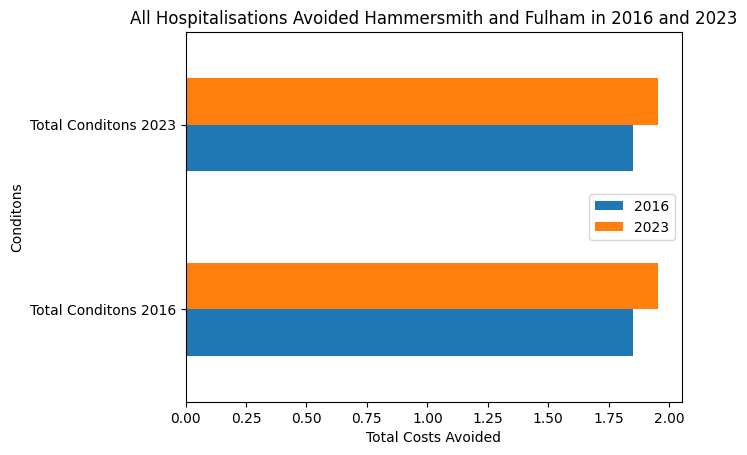

In [95]:
import matplotlib.pyplot as plt

# Total Conditions in Hammersmith and Fulham in 2016 and 2023

Total_Conditions_2016 = [1.851305]
Total_Conditions_2023 = [1.953297]
index = ['Total Conditons 2016', 'Total Conditons 2023']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('All Hospitalisations Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

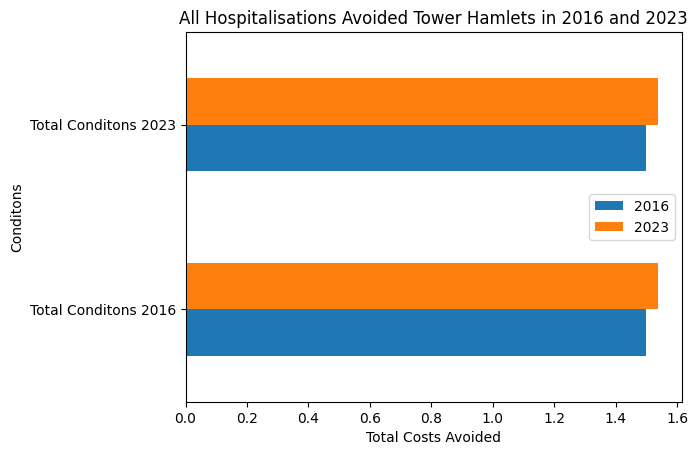

In [96]:
import matplotlib.pyplot as plt

# Total Conditions Avoided in Tower Hamlets in 2016 and 2023

Total_Conditions_2016 = [1.498632]
Total_Conditions_2023 = [1.537564]
index = ['Total Conditons 2016', 'Total Conditons 2023']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('All Hospitalisations Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

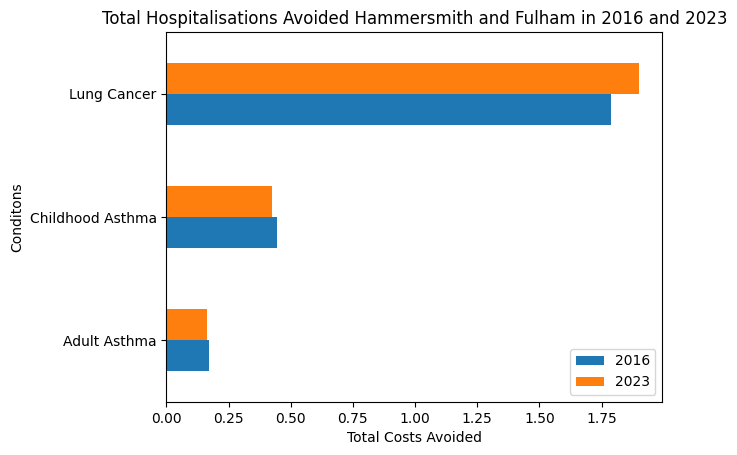

In [90]:
Total_Conditions_2016 = [0.171604, 0.444569, 1.788922]
Total_Conditions_2023 = [0.16485, 0.42317, 1.89977]
index = ['Adult Asthma','Childhood Asthma', 'Lung Cancer']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('Total Hospitalisations Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

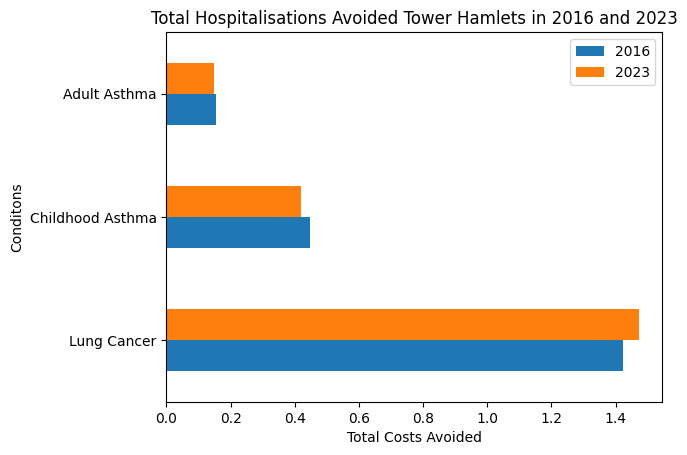

In [91]:
import matplotlib.pyplot as plt

# Total Hospitalisations Avoided in Tower Hamlets in 2016 and 2023

Total_Conditions_2016 = [1.421717, 0.447846, 0.155088]
Total_Conditions_2023 = [1.472277, 0.418027, 0.147502]
index = ['Lung Cancer','Childhood Asthma', 'Adult Asthma']
df = pd.DataFrame({'2016': Total_Conditions_2016,'2023': Total_Conditions_2023}, index=index)
ax = df.plot.barh()

plt.title('Total Hospitalisations Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

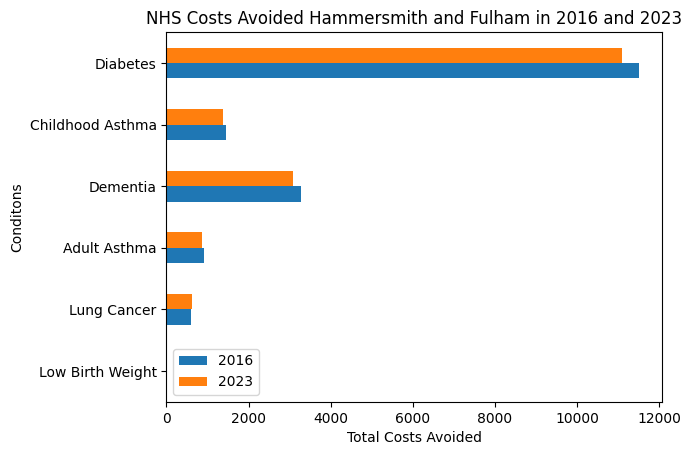

In [92]:
import matplotlib.pyplot as plt

# NHS Costs Avoided for years 2016 and 2023 against Conditions/Diseases in Hammersmith and Fulham

Costs_Avoided_2016 = [0.00,596.33, 914.26, 3269.29, 1458.81, 11503.77]
Costs_Avoided_2023 = [0.00, 633.25, 878.12, 3072.12, 1387.98, 11087.60]
index = ['Low Birth Weight','Lung Cancer','Adult Asthma','Dementia','Childhood Asthma', 'Diabetes' ]
df = pd.DataFrame({'2016': Costs_Avoided_2016,'2023': Costs_Avoided_2023}, index=index)
ax = df.plot.barh()

plt.title('NHS Costs Avoided Hammersmith and Fulham in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total Costs Avoided')
plt.legend()

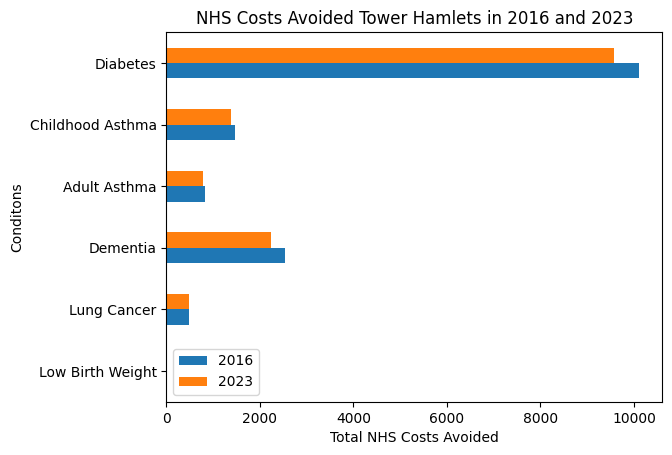

In [109]:
import matplotlib.pyplot as plt

# NHS Costs Avoided for years 2016 and 2023 avoided against Conditions/Diseases in Tower Hamlets

Costs_Avoided_2016 = [0.00, 473.95, 2540.35,828.68, 1472.89, 10103.83]
Costs_Avoided_2023 = [0.00, 490.79, 2232.62, 788.06,1374.11, 9580.45]
index = ['Low Birth Weight','Lung Cancer', 'Dementia','Adult Asthma', 'Childhood Asthma', 'Diabetes' ]
df = pd.DataFrame({'2016': Costs_Avoided_2016,'2023': Costs_Avoided_2023}, index=index)
ax = df.plot.barh()

plt.title('NHS Costs Avoided Tower Hamlets in 2016 and 2023')
plt.ylabel('Conditons')
plt.xlabel('Total NHS Costs Avoided')
plt.legend()

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2016')

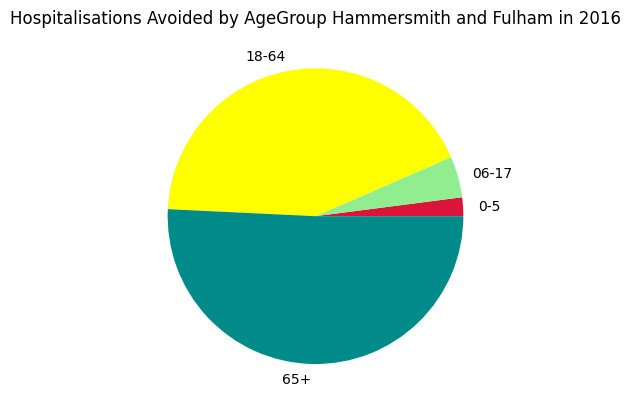

In [110]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2016
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [7.4, 16.23, 154.4, 183.5]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'yellow', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2016')

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2023')

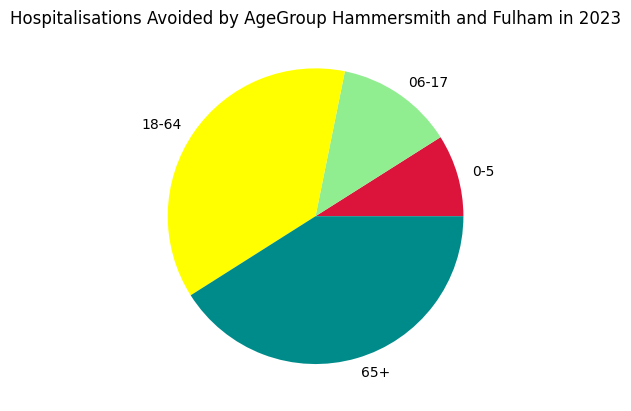

In [111]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Hammersmith and Fulham 2023
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [39.7, 56.8, 164.4, 181.4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'yellow', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Hammersmith and Fulham in 2023')

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Tower Hamlets in 2016')

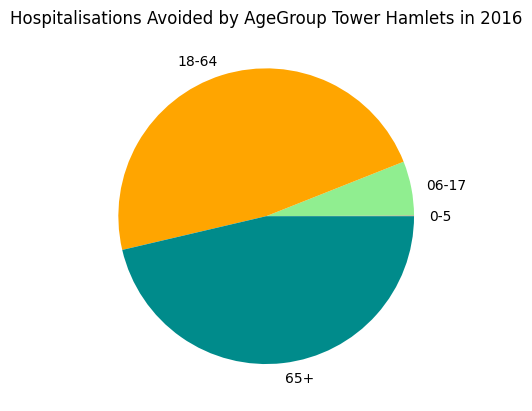

In [112]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Tower Hamlets 2016
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [0.2, 17.1, 137.2, 133.4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'orange', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Tower Hamlets in 2016')

Text(0.5, 1.0, 'Hospitalisations Avoided by AgeGroup Tower Hamlets in 2023')

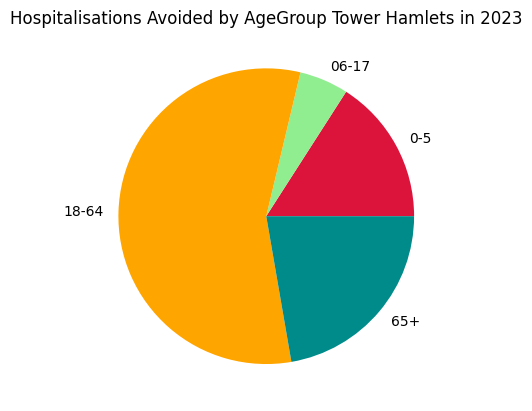

In [113]:
import matplotlib.pyplot as plt

# NHS Costs avoided against AgeGroups in Tower Hamlets 2023
# figures were converted from decimal to % then rounded to X1DP

labels = '0-5', '06-17', '18-64', '65+'
sizes = [38.3, 12.9, 135.8, 53.6]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=(['crimson', 'lightgreen', 'orange', 'darkcyan']))
plt.title('Hospitalisations Avoided by AgeGroup Tower Hamlets in 2023')

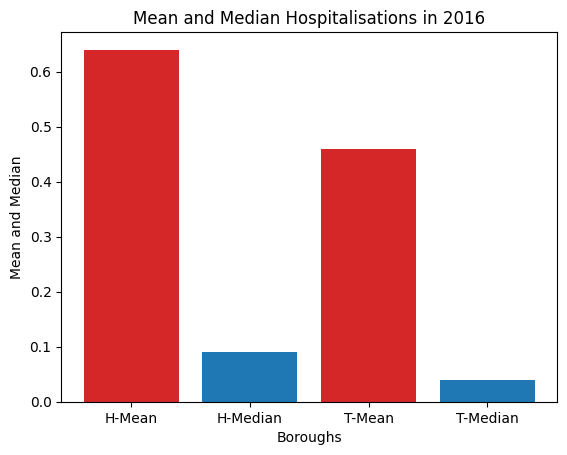

In [114]:
import matplotlib.pyplot as plt

# Taken from the filtered data Mean and Median no. Hospitalisations Avoided in 2016 for both boroughs has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['H-Mean', 'H-Median', 'T-Mean', 'T-Median']
counts =   [0.64, 0.09, 0.46, 0.04]
bar_labels = ['Ham 16', 'Ham 16','Tow 16', 'Tow 16']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Mean and Median')
ax.set_xlabel('Boroughs')
ax.set_title('Mean and Median Hospitalisations in 2016')

plt.show()

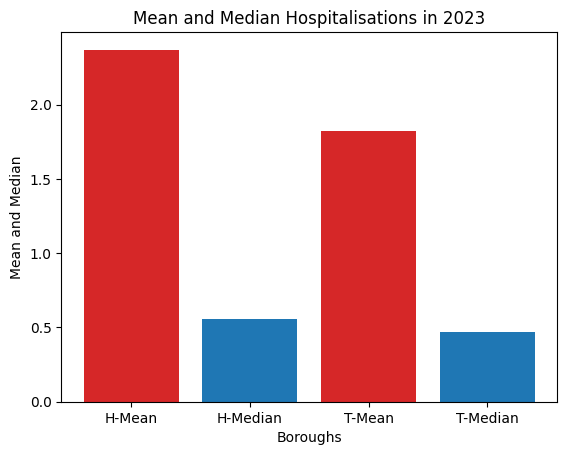

In [115]:
import matplotlib.pyplot as plt

# Taken from the filtered data Mean and Median no. Hospitalisations Avoided in 2023 has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['H-Mean', 'H-Median', 'T-Mean', 'T-Median']
counts = [2.37, 0.56, 1.82, 0.47]
bar_labels = ['Ham 23', 'Ham 23','Tow 23', 'Tow 23']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Mean and Median')
ax.set_xlabel('Boroughs')
ax.set_title('Mean and Median Hospitalisations in 2023')

plt.show()

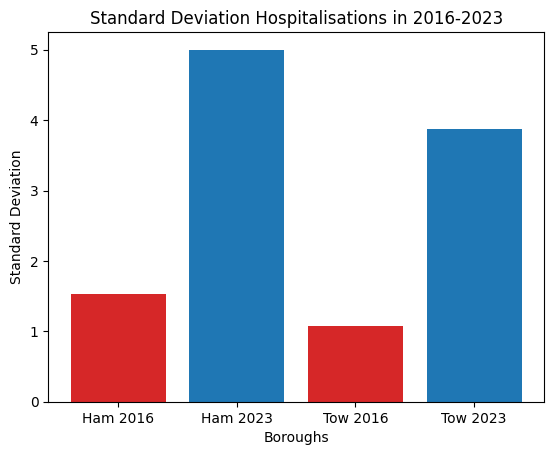

In [116]:
import matplotlib.pyplot as plt

# Taken from the filtered data Standard Deviation no. Hospitalisations Avoided in 2016 has been rounded to X2DP

fig, ax = plt.subplots()

boroughs = ['Ham 2016', 'Ham 2023', 'Tow 2016', 'Tow 2023']
counts = [1.53, 5.00, 1.07, 3.87]
bar_labels = ['Ham 16', 'Ham 23','Tow 16', 'Tow 23']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue']

ax.bar(boroughs, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Standard Deviation')
ax.set_xlabel('Boroughs')
ax.set_title('Standard Deviation Hospitalisations in 2016-2023')

plt.show()